In [1]:
import pandas as pd

In [2]:

df = pd.read_csv("data/titanic_kaggle.csv")
df_titanic = df.sample(frac=0.75)
df_test = df.loc[df.index.difference(df_titanic),:]
    

In [3]:

from binarybeech.binarybeech import *
import binarybeech.utils as utils


In [4]:

import logging
logging.basicConfig(level=logging.INFO)


In [5]:

rf_titanic = RandomForest(df_titanic.copy(),"Survived", cart_settings={"max_depth":4,"min_leaf_samples":2, "min_split_samples":2},sample_frac=0.3,n_attributes=5,metrics_type="classification"
                                 )

In [6]:

rf_titanic.train(20)


A tree with 14 leafs was created
A tree with 15 leafs was created
A tree with 9 leafs was created
A tree with 11 leafs was created
A tree with 9 leafs was created
A tree with 13 leafs was created
A tree with 10 leafs was created
A tree with 11 leafs was created
A tree with 11 leafs was created
A tree with 9 leafs was created
A tree with 11 leafs was created
A tree with 13 leafs was created
A tree with 11 leafs was created
A tree with 13 leafs was created
A tree with 14 leafs was created
A tree with 13 leafs was created
A tree with 12 leafs was created
A tree with 13 leafs was created
A tree with 15 leafs was created
A tree with 13 leafs was created


In [7]:

rf_titanic.validate_oob()


{'precision': array([0.88321168, 0.63035019]),
 'recall': array([0.79257642, 0.77142857]),
 'F-score': 0.7646165939338085,
 'accuracy': 0.7859281437125748}

In [8]:

rf_titanic.validate()


{'precision': array([0.90024331, 0.65758755]),
 'recall': array([0.80786026, 0.8047619 ]),
 'F-score': 0.78766112319903,
 'accuracy': 0.8068862275449101}

In [9]:

rf_titanic.variable_importance()


{'Sex': 1.0,
 'Fare': 0.2042553191489361,
 'PassengerId': 0.1212765957446809,
 'Age': 0.10425531914893618,
 'Pclass': 0.06808510638297874,
 'SibSp': 0.04680851063829785,
 'Parch': 0.04042553191489362,
 'Embarked': 0.008510638297872377,
 'Name': 0.0,
 'Ticket': 0.0,
 'Cabin': 0.0}

In [10]:

import binarybeech.utils as bu
bu.print_bars(rf_titanic.variable_importance(),max_width=50)



Sex       |############################### 1.0
Fare      |######                          0.2
PassengerId|####                           0.12
Age       |###                             0.1
Pclass    |##                             0.068
SibSp     |#                              0.047
Parch     |#                              0.04
Embarked  |                               0.0085
Name      |                                0.0
Ticket    |                                0.0
Cabin     |                                0.0


In [11]:

rf_titanic.validate(df_test)


{'precision': array([0.89981785, 0.64912281]),
 'recall': array([0.80456026, 0.80144404]),
 'F-score': 0.7834065150986878,
 'accuracy': 0.8035914702581369}

In [12]:

gbt_titanic = GradientBoostedTree(df_titanic.copy(),"Survived", cart_settings={"max_depth":2,"min_leaf_samples":10, "min_split_samples":10},sample_frac=0.75,n_attributes=9
                                 )

In [13]:
gbt_titanic.X_names

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [14]:
it=gbt_titanic._initial_tree()

A tree with 1 leafs was created


In [15]:

utils.print_tree(it.tree)

0.3847305389221557



In [16]:
it.tree.root

In [17]:

gbt_titanic.learning_rate=0.01
#gbt_titanic.create_trees(200)


In [18]:

gbt_titanic._predict(df_titanic.iloc[0])

0.38473053892215575

In [19]:

gbt_titanic.validate(df_test)


/home/jovyan/binarybeech/metrics.py:84: RuntimeWarning: invalid value encountered in true_divide
  return np.diag(m) / np.sum(m, axis=0)


{'precision': array([1., 0.]),
 'recall': array([0.61616162,        nan]),
 'F-score': nan,
 'accuracy': 0.6161616161616161}

#k-fold cross-validation

In [20]:

c = CART(df_titanic,"Survived",metrics_type="classification")


A tree with 127 leafs was created
A tree with 119 leafs was created
A tree with 103 leafs was created
A tree with 98 leafs was created
A tree with 90 leafs was created
A tree with 85 leafs was created


INFO:matplotlib.font_manager:generated new fontManager
INFO:binarybeech.binarybeech:beta_best: 0.004644338939367838


A tree with 127 leafs was created


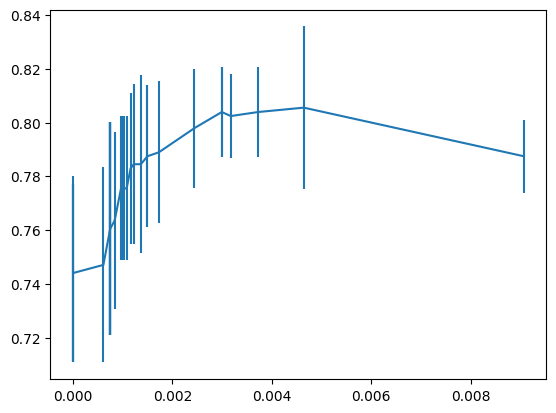

In [21]:
c.train(slack=1e-3)

In [22]:
c.tree.leaf_count()

4

In [23]:
c.tree.show()

AttributeError: 'Tree' object has no attribute 'show'

In [ ]:
c.validate(df_test)